In [1]:

# Path: Bloch_S.ipynb
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from qutip import Bloch, about, basis, mesolve, sigmam, sigmax, sigmay, sigmaz
from qutip.ipynbtools import plot_animation
from qutip import *

%matplotlib inline

b = qutip.Bloch()

vec = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
b.add_vectors(vec)


N=60
n=4
detuning = 0.0
psi1=basis(2, 0)+basis(2, 1)
psi2=basis(N, 2)+basis(N, 3)-basis(N, 4)
psi0=tensor(psi1,psi2).unit()

smplus = tensor(create(2),qeye(N))
smminus =tensor(destroy(2),qeye(N))
smz = smplus*smminus - smminus*smplus
smx=(smplus+smminus)*0.5
smy=-1j*(-smplus+smminus)*0.5




a = tensor(qeye(2),destroy(N))
adagger = tensor(qeye(2),create(N))
g=0.05
t= np.linspace(0.0,100,100) 
#H =  g*(smplus*a+smminus*adagger)+0.5*0.5*smz+a*adagger*0.5
H =  g*(smplus*a+smminus*adagger)+detuning*smminus*smplus
output = sesolve(H,psi0,t,[smz,smplus*smminus, smminus*smplus,smplus,smminus,smminus*adagger+smplus*a,adagger*a,smx,smy],options=None)
#Ahora vamos a representar estos resultados en la esfera de Bloch
def plot_setup(output):
        
            fig = plt.figure(figsize=(6, 6))
            axes = Axes3D(fig, azim=-40, elev=30)
        
            return fig, axes

sphere = None

#Veamos la esféra
def plot_result(output, n, fig=None, axes=None):
        

            global sphere
        
            if fig is None or axes is None:
                fig, axes = plot_setup(result)
        
            if not sphere:
                sphere = Bloch(axes=axes)
                sphere.vector_color = ["r"]

        
            sphere.clear()
            sphere.add_vectors([output.expect[7][n],
                                output.expect[8][n],
                                output.expect[0][n]])
            sphere.add_points(
                [
                    output.expect[7][: n + 1],
                    output.expect[8][: n + 1],
                    output.expect[0][: n + 1],
                ],
                meth="l",
            )
            sphere.make_sphere()
        
            return axes.artists


#POner nombbre al video
plot_animation(plot_setup, plot_result, output, writer="ffmpeg", codec=None)
        


#Imprimir el modulo del vector de Bloch en función del tiempo
 





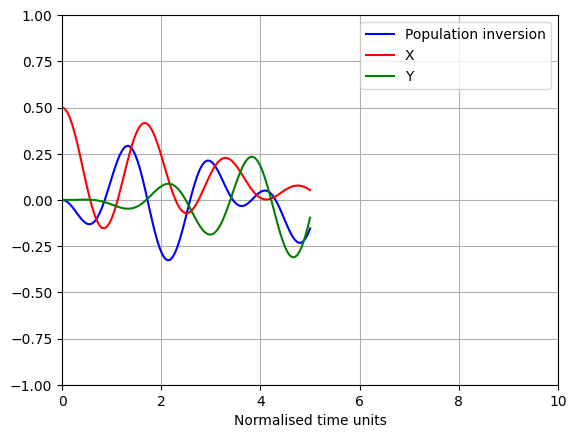

In [2]:
#Grafiquemos las componentes del vector de Bloch en función del tiempo
na = output.expect[0]
nb = output.expect[7]
nc = output.expect[8]
plt.plot(g*t,na,'blue',label='Population inversion')
plt.plot(g*t,nb,'red',label='X')
plt.plot(g*t,nc,'green',label='Y')
plt.axis([0,10,-1,1])
plt.xlabel('Normalised time units')
#plt.ylim(-0.001,0.001)
plt.grid()
plt.legend()
plt.show()


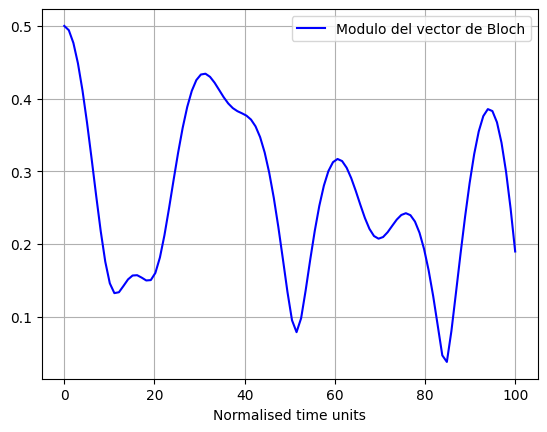

In [3]:
#Veamos el modulo del vector de Bloch
l=[] #Lista donde guardaremos los valores del modulo del vector de Bloch
for i in range(0,100):
    
    modulo=np.sqrt(output.expect[0][i]**2+output.expect[7][i]**2+output.expect[8][i]**2)#Calculamos el modulo del vector de Bloch
    l.append(modulo)

plt.plot(t,l,'blue',label='Modulo del vector de Bloch')
#plt.axis([0,10,-1,1])
plt.xlabel('Normalised time units')
#plt.ylim(-0.001,0.001)
plt.grid()
plt.legend()
plt.show()


In [6]:
import numpy as np
import qutip
def qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist):
# operators and the hamiltonian
    sx = qutip.sigmax()
    sy = qutip.sigmay()
    sz = qutip.sigmaz()
    sm = qutip.sigmam()
    H = w * (np.cos(theta) * sz + np.sin(theta) * sx)
    # collapse operators
    c_op_list = []
    n_th = 0.5 # temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sz)
    # evolve and calculate expectation values
    output = qutip.mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])
    return output.expect[0], output.expect[1], output.expect[2]
## calculate the dynamics
w = 1.0 * 2 * np.pi # qubit angular frequency
theta = 0.2 * np.pi # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.5 # qubit relaxation rate
gamma2 = 0.2 # qubit dephasing rate
# initial state
a = 1.0
psi0 = (a*qutip.basis(2, 0) + (1-a)*qutip.basis(2, 1))/np.sqrt(a**2 + (1-a)**2)
tlist = np.linspace(0, 4, 250)
#expectation values for ploting
sx, sy, sz = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)

In [7]:
import numpy as np
b = qutip.Bloch()
b.vector_color = ['r']
b.view = [-40, 30]
for i in range(len(sx)):
    b.clear()
    b.add_vectors([np.sin(theta), 0, np.cos(theta)])
    b.add_points([sx[:i+1], sy[:i+1], sz[:i+1]])
    b.save(dirc='temp') # saving images to temp directory in current working˓→directory

In [15]:
from matplotlib import pyplot, animation
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = Axes3D(fig, azim=-40, elev=30)
sphere = qutip.Bloch(axes=ax)
def animate(i):
    sphere.clear()
    sphere.add_vectors([np.sin(theta), 0, np.cos(theta)])
    sphere.add_points([sx[:i+1], sy[:i+1], sz[:i+1]])
    sphere.make_sphere()
    return ax
def init():
    sphere.vector_color = ['r']
    return ax
ani = animation.FuncAnimation(fig, animate, np.arange(len(sx)),
init_func=init, blit=False, repeat=False)
ani.save('bloch_sphere.mp4',fps=30)

TypeError: AbstractMovieWriter.__init__() got an unexpected keyword argument 'extra_args'

<Figure size 640x480 with 0 Axes>